In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from astropy.time import Time
from matplotlib import patches
from astropy.coordinates import SkyCoord
import astropy.units as u
import matplotlib.font_manager as fm
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar

In [2]:
target = '3I/ATLAS (C/2025 N1)'
sector = 92

In [3]:
btjd0 = 2457000
mpc1st = Time("2025-05-21T22:40:14.704", format="isot", scale="utc")
discovery_date = Time("2025-07-01T05:15:11.21", format="isot", scale="utc")

In [5]:
lc1 = pd.read_csv("../data/3i_s0092_2-3_lc.csv", index_col=0)
lc2 = pd.read_csv("../data/3i_s0092_1-2_lc.csv", index_col=0)
lc = pd.concat([lc1, lc2], axis=0).sort_values("time_tdb").reset_index(drop=True)
lc

,time_tdb,time_e,t_win,ap_flux,ap_flux_err,npix_detect,empty_flux,empty_flux_e,nt_ap_flux,nt_ap_flux_e,...,time_utc_geo,psf_flux,psf_flux_err,psf_mag,psf_mag_err,v_mag,ra_ephem,dec_ephem,ra_model,dec_model
0,2.460804e+06,0.520886,2.083541,0.579229,0.188393,2.0,0.041454,0.136520,0.864348,0.229936,...,2.460804e+06,0.652136,0.177146,20.904154,0.299137,19.596467,288.145016,-18.704941,288.148293,-18.705931
1,2.460806e+06,0.520884,2.083533,0.317999,0.180103,1.0,-0.040498,0.120143,0.659133,0.208339,...,2.460806e+06,0.615402,0.171946,20.967103,0.307453,19.534868,287.859421,-18.691421,287.862892,-18.689362
2,2.460808e+06,0.520881,2.083525,0.417454,0.171737,2.0,0.060519,0.119780,0.144258,0.209842,...,2.460808e+06,0.518862,0.164701,21.152370,0.348250,19.473426,287.545615,-18.682061,287.549061,-18.680432
3,2.460810e+06,0.520879,2.298814,0.363473,0.178811,1.0,-0.030654,0.125969,1.151826,0.223125,...,2.460810e+06,0.775111,0.180193,20.716590,0.257310,19.404286,287.174324,-18.678788,287.177379,-18.678503
4,2.460813e+06,0.520878,2.083511,0.716149,0.181587,2.0,0.002121,0.127913,0.997108,0.232654,...,2.460813e+06,1.318270,0.186553,20.139989,0.161577,19.341742,286.818249,-18.682879,286.820960,-18.681145
5,2.460817e+06,0.409758,1.421420,0.563384,0.395179,1.0,0.016362,0.305410,1.568906,0.303090,...,2.460817e+06,1.337067,0.253697,20.124617,0.211990,19.209173,286.044842,-18.704882,286.046352,-18.701293
6,2.460818e+06,0.300952,1.203807,1.412402,0.355350,2.0,0.109134,0.250596,1.644646,0.272417,...,2.460818e+06,1.724529,0.213361,19.848324,0.143333,19.171682,285.803729,-18.701706,285.804378,-18.698238
7,2.460819e+06,0.300951,1.203803,1.590032,0.353950,3.0,-0.119190,0.252313,1.992330,0.272844,...,2.460819e+06,1.773226,0.224193,19.818090,0.146095,19.133663,285.546765,-18.697126,285.547152,-18.693986
8,2.460820e+06,0.300950,1.203799,1.297085,0.353985,3.0,0.001491,0.241532,1.705063,0.271334,...,2.460820e+06,1.754678,0.217324,19.829506,0.143467,19.095503,285.277882,-18.693694,285.278422,-18.691015
9,2.460822e+06,0.300949,1.203795,1.605221,0.364196,4.0,0.058623,0.284683,2.056222,0.308900,...,2.460822e+06,1.939173,0.228458,19.720958,0.137338,19.058012,284.998927,-18.692039,284.999864,-18.689877


In [6]:
lc["psf_mag_p"] = np.abs(-2.5 * np.log10(lc.psf_flux + lc.psf_flux_err) + 20.44 - lc.psf_mag)
lc["psf_mag_m"] = np.abs(-2.5 * np.log10(lc.psf_flux - lc.psf_flux_err) + 20.44 - lc.psf_mag)
lc["ap_mag_p"] = np.abs(-2.5 * np.log10(lc.ap_flux + lc.ap_flux_err) + 20.44 - lc.ap_mag)
lc["ap_mag_m"] = np.abs(-2.5 * np.log10(lc.ap_flux - lc.ap_flux_err) + 20.44 - lc.ap_mag)

# TESS LC plot

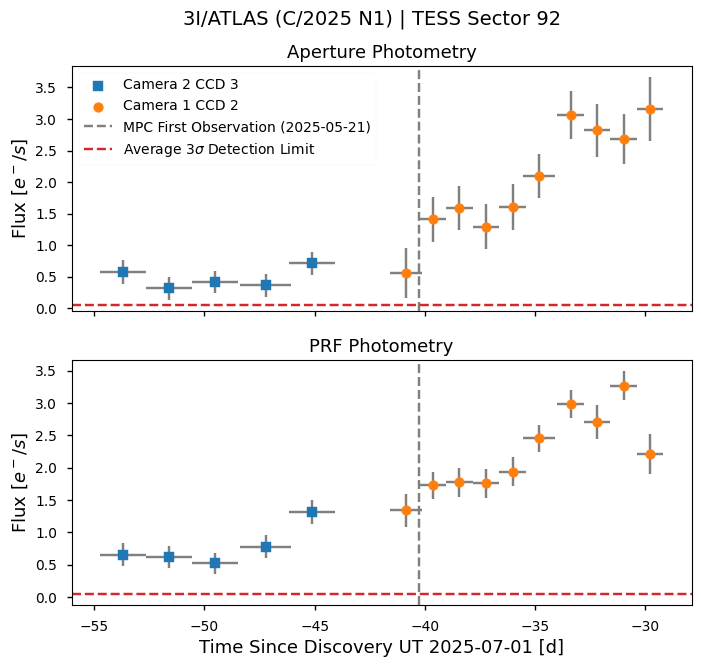

In [17]:
with plt.style.context("seaborn-v0_8-notebook"):
    fig, ax = plt.subplots(2, 1, figsize=(8, 7), sharex=True)
    fig.suptitle(f"{target} | TESS Sector {sector}", y=0.96, fontsize=14)

    ax[0].errorbar(
        lc.time_utc_geo - discovery_date.jd,
        lc.ap_flux,
        xerr=lc.t_win / 2,
        yerr=lc.ap_flux_err,
        fmt=".",
        c="gray",
    )
    ax[1].errorbar(
        lc.time_utc_geo - discovery_date.jd,
        lc.psf_flux,
        xerr=lc.t_win / 2,
        yerr=lc.psf_flux_err,
        fmt=".",
        c="gray",
    )

    c2 = lc.query("camera == 2")
    ax[0].scatter(
        c2.time_utc_geo - discovery_date.jd,
        c2.ap_flux,
        zorder=1000,
        marker="s",
        label=f"Camera {c2.camera.iloc[0]} CCD {c2.ccd.iloc[0]}",
    )
    ax[1].scatter(
        c2.time_utc_geo - discovery_date.jd, c2.psf_flux, zorder=1000, marker="s"
    )

    c1 = lc.query("camera == 1")

    ax[0].scatter(
        c1.time_utc_geo - discovery_date.jd,
        c1.ap_flux,
        zorder=1000,
        marker="o",
        label=f"Camera {c1.camera.iloc[0]} CCD {c1.ccd.iloc[0]}",
    )
    ax[1].scatter(
        c1.time_utc_geo - discovery_date.jd, c1.psf_flux, zorder=1000, marker="o"
    )
    ax[0].set_title("Aperture Photometry", fontsize=13)
    ax[1].set_title("PRF Photometry", fontsize=13)

    for axx in ax:
        axx.axvline(
            (mpc1st - discovery_date).jd,
            c="gray",
            ls="--",
            label=f"MPC First Observation ({mpc1st.iso[:10]})",
        )
        axx.axhline(
            np.median(lc.empty_flux3), c="tab:red", ls="--", label="Average $3\sigma$ Detection Limit"
        )

    ax[0].set_ylabel("Flux [$e^-/s$]", fontsize=13)
    ax[1].set_ylabel("Flux [$e^-/s$]", fontsize=13)
    ax[1].set_xlabel(
        f"Time Since Discovery UT {discovery_date.iso[:10]} [d]", fontsize=13
    )

    ax[0].legend(fontsize="medium", framealpha=0.2)

    plt.savefig(
        f"../data/figures/c2025n1_lc_flux_s{sector:04}.pdf",
        format="pdf",
        bbox_inches="tight",
    )

    plt.show()


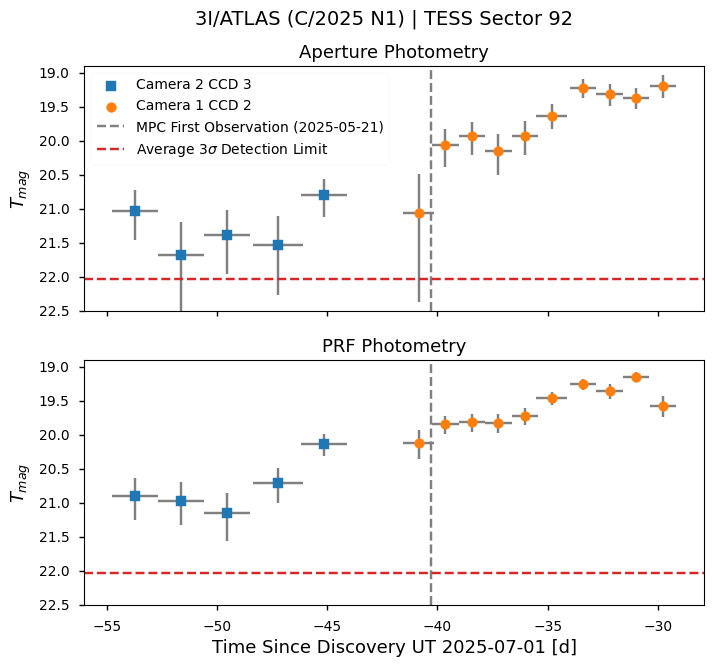

In [16]:
with plt.style.context("seaborn-v0_8-notebook"):
    fig, ax = plt.subplots(2, 1, figsize=(8, 7), sharex=True)
    fig.suptitle(f"{target} | TESS Sector {sector}", y=0.96, fontsize=14)

    ax[0].errorbar(
        lc.time_utc_geo - discovery_date.jd,
        lc.ap_mag,
        xerr=lc.t_win / 2,
        yerr=(lc.ap_mag_p, lc.ap_mag_m),
        fmt=".",
        c="gray",
    )
    ax[1].errorbar(
        lc.time_utc_geo - discovery_date.jd,
        lc.psf_mag,
        xerr=lc.t_win / 2,
        yerr=(lc.psf_mag_p, lc.psf_mag_m),
        fmt=".",
        c="gray",
    )

    c2 = lc.query("camera == 2")
    ax[0].scatter(
        c2.time_utc_geo - discovery_date.jd,
        c2.ap_mag,
        zorder=1000,
        marker="s",
        label=f"Camera {c2.camera.iloc[0]} CCD {c2.ccd.iloc[0]}",
    )
    ax[1].scatter(
        c2.time_utc_geo - discovery_date.jd, c2.psf_mag, zorder=1000, marker="s"
    )

    c1 = lc.query("camera == 1")

    ax[0].scatter(
        c1.time_utc_geo - discovery_date.jd,
        c1.ap_mag,
        zorder=1000,
        marker="o",
        label=f"Camera {c1.camera.iloc[0]} CCD {c1.ccd.iloc[0]}",
    )
    ax[1].scatter(
        c1.time_utc_geo - discovery_date.jd, c1.psf_mag, zorder=1000, marker="o"
    )

    ax[0].set_ylim((22.5, 18.9))
    ax[1].set_ylim((22.5, 18.9))
    ax[0].set_title("Aperture Photometry", fontsize=13)
    ax[1].set_title("PRF Photometry", fontsize=13)

    for axx in ax:
        axx.axvline(
            (mpc1st - discovery_date).jd,
            c="gray",
            ls="--",
            label=f"MPC First Observation ({mpc1st.iso[:10]})",
        )
        axx.axhline(
            np.percentile(lc.empty_mag3, 40), c="tab:red", ls="--", label="Average $3\sigma$ Detection Limit"
        )

    ax[0].set_ylabel("$T_{mag}$", fontsize=13)
    ax[1].set_ylabel("$T_{mag}$", fontsize=13)
    ax[1].set_xlabel(
        f"Time Since Discovery UT {discovery_date.iso[:10]} [d]", fontsize=13
    )

    ax[0].legend(fontsize="medium", framealpha=0.2)

    plt.savefig(
        f"../data/figures/c2025n1_lc_mag_s{sector:04}.png",
        format="png",
        bbox_inches="tight",
    )

    plt.show()


## LATEX table

In [18]:
lc["time_iso"] = Time(lc.time_utc_geo, format="jd", scale="utc").iso
lc["snr_ap"] = np.abs(lc.ap_flux / np.mean(lc.empty_flux3))
lc["snr_prf"] = np.abs(lc.psf_flux / np.mean(lc.empty_flux3))

In [19]:
coord_org = SkyCoord(lc.ra_ephem.values, lc.dec_ephem.values, unit="deg")
lc["ra_ephem_hhmmss"] = coord_org.ra.to_string(unit=u.hourangle, format="latex", precision=1)
lc["dec_ephem_ddmmss"] = coord_org.dec.to_string(unit=u.deg, format="latex", precision=1)

coord_corr = SkyCoord(lc.ra_model.values, lc.dec_model.values, unit="deg")
lc["ra_model_hhmmss"] = coord_corr.ra.to_string(unit=u.hourangle, format="latex", precision=1)
lc["dec_model_ddmmss"] = coord_corr.dec.to_string(unit=u.deg, format="latex", precision=1)

lc["ra_offset"] = ((coord_org.ra - coord_corr.ra).to("arcsec")).value
lc["dec_offset"] = ((coord_org.dec - coord_corr.dec).to("arcsec")).value

lc["ra_offset_str"] = ((coord_org.ra - coord_corr.ra).to("arcsec")).to_string(unit=u.arcsec, format="latex", precision=1)
lc["dec_offset_str"] = ((coord_org.dec - coord_corr.dec).to("arcsec")).to_string(unit=u.arcsec, format="latex", precision=1)

In [22]:
print(
    lc.loc[
        :,
        [
            "time_iso",
            "ra_model_hhmmss",
            "ra_model_hhmmss",
            "ap_flux",
            "ap_flux_err",
            "ap_mag",
            "ap_mag_err",
            "psf_flux",
            "psf_flux_err",
            "psf_mag",
            "psf_mag_err",
        ],
    ].to_latex(index=False, float_format="%.2f")
)

\begin{tabular}{lllrrrrrrrr}
\toprule
time_iso & ra_model_hhmmss & ra_model_hhmmss & ap_flux & ap_flux_err & ap_mag & ap_mag_err & psf_flux & psf_flux_err & psf_mag & psf_mag_err \\
\midrule
2025-05-08 12:25:25.719 & $19^{\mathrm{h}}12^{\mathrm{m}}35.6^{\mathrm{s}}$ & $19^{\mathrm{h}}12^{\mathrm{m}}35.6^{\mathrm{s}}$ & 0.58 & 0.19 & 21.03 & 0.36 & 0.65 & 0.18 & 20.90 & 0.30 \\
2025-05-10 14:29:03.715 & $19^{\mathrm{h}}11^{\mathrm{m}}27.1^{\mathrm{s}}$ & $19^{\mathrm{h}}11^{\mathrm{m}}27.1^{\mathrm{s}}$ & 0.32 & 0.18 & 21.68 & 0.62 & 0.62 & 0.17 & 20.97 & 0.31 \\
2025-05-12 16:32:40.826 & $19^{\mathrm{h}}10^{\mathrm{m}}11.8^{\mathrm{s}}$ & $19^{\mathrm{h}}10^{\mathrm{m}}11.8^{\mathrm{s}}$ & 0.42 & 0.17 & 21.39 & 0.45 & 0.52 & 0.16 & 21.15 & 0.35 \\
2025-05-14 23:46:18.753 & $19^{\mathrm{h}}08^{\mathrm{m}}42.6^{\mathrm{s}}$ & $19^{\mathrm{h}}08^{\mathrm{m}}42.6^{\mathrm{s}}$ & 0.36 & 0.18 & 21.54 & 0.54 & 0.78 & 0.18 & 20.72 & 0.26 \\
2025-05-17 01:49:54.218 & $19^{\mathrm{h}}07^{\mathrm

# MPC data

In [23]:
s92 = np.array([2460802.9695323096, 2460829.644819287])

In [25]:
mpc = pd.read_xml("../data/3i_mpc_20250729.xml")
mpc["time_jd"] = Time(mpc.obsTime.values.astype(str), format="isot", scale="utc").jd
mpc.head()

,permID,trkSub,obsID,trkID,trkMPC,mode,stn,obsTime,rmsTime,ra,...,sys,ctr,pos1,pos2,pos3,rmsCorr,nucMag,provID,fltr,time_jd
0,3I,L1,LpG6Ss8C0000GwfH010000001,00000IuVcp,L1,CCD,M01,2025-05-21T22:40:14.704Z,0.5,285.919769,...,None,NaN,NaN,NaN,NaN,NaN,NaN,None,None,2.460817e+06
1,3I,None,LpH5Y9Ea0000Gwir010000001,00000IuXTV,None,CCD,I41,2025-05-22T08:57:59.999Z,NaN,285.832073,...,None,NaN,NaN,NaN,NaN,NaN,NaN,None,None,2.460818e+06
2,3I,None,LpH5Y9Ea0000Gwir010000002,00000IuXTV,None,CCD,I41,2025-05-22T09:31:24.997Z,NaN,285.827080,...,None,NaN,NaN,NaN,NaN,NaN,NaN,None,None,2.460818e+06
3,3I,None,LpH5Y9Ea0000Gwir010000003,00000IuXTW,None,CCD,I41,2025-05-27T09:02:58.001Z,NaN,284.724796,...,None,NaN,NaN,NaN,NaN,NaN,NaN,None,None,2.460823e+06
4,3I,None,LpH5Y9Ea0000Gwir010000004,00000IuXTX,None,CCD,I41,2025-06-04T08:40:45.998Z,NaN,282.612045,...,None,NaN,NaN,NaN,NaN,NaN,NaN,None,None,2.460831e+06


In [26]:
lsst = pd.read_csv("../data/3i_lsst.csv", index_col=0)
lsst["time_jd"] = Time(lsst.DateMidpoint.values.astype(str), format="isot", scale="utc").jd
lsst["stn"] = "X05"
lsst.head()

,DateMidpoint,Filter,Meas_RA,MeasDec,Mag,MagErr,r,Delta,Elong,Phase,SkyVel,SkyPA,time_jd,stn
Row,,,,,,,,,,,,,,
1,2025-06-21T08:11:32.665,z,NaN,NaN,NaN,NaN,4.839,3.830,172.22,1.63,1.021,270.25,2.460848e+06,X05
2,2025-06-22T02:32:47.429,g,NaN,NaN,NaN,NaN,4.813,3.803,173.02,1.47,1.037,270.11,2.460849e+06,X05
3,2025-06-22T03:07:49.625,r,NaN,NaN,NaN,NaN,4.813,3.802,173.05,1.46,1.038,270.13,2.460849e+06,X05
4,2025-06-24T03:07:46.213,i,NaN,NaN,NaN,NaN,4.746,3.733,174.77,1.12,1.079,270.33,2.460851e+06,X05
5,2025-06-30T02:25:46.504,i,NaN,NaN,NaN,NaN,4.546,3.536,172.45,1.68,1.199,270.96,2.460857e+06,X05


In [27]:
# Combine MPC and Rubin observations
cols = ["time_utc", "band", "mag", "mag_e", "stn"]
others_lc = pd.concat([
    mpc.rename(columns={"time_jd": "time_utc", "band": "band", "mag": "mag", "rmsMag": "mag_e"}).loc[:, cols],
    lsst.rename(columns={"time_jd": "time_utc", "Filter": "band", "Mag": "mag", "MagErr": "mag_e"}).loc[:, cols],
], axis=0
).sort_values("time_utc").reset_index(drop=True)
others_lc

,time_utc,band,mag,mag_e,stn
0,2.460817e+06,c,20.0772,0.12,M01
1,2.460818e+06,g,20.4900,NaN,I41
2,2.460818e+06,r,20.1000,NaN,I41
3,2.460823e+06,r,20.2900,NaN,I41
4,2.460831e+06,r,19.9000,NaN,I41
...,...,...,...,...,...
2236,2.460885e+06,G,17.0000,0.12,X76
2237,2.460885e+06,G,17.3000,0.20,X76
2238,2.460885e+06,V,16.6000,NaN,X33
2239,2.460885e+06,V,17.4000,NaN,X33


In [28]:
plot_filters = [["g","r","i","z","y"], ["G","V","R"], ["Ac", "Ao", "w"], ["S"], ["c"]]
plot_colors = [plt.get_cmap("rainbow")(np.linspace(0, 1, 10))[5:],
               ["tab:green", "yellow", "crimson"],
               ["cyan", "tab:orange", "tab:brown"],
               ["gray"], ["blue"]
              ]
plot_teslecope = ["X05", "W68", "T05", "W84"]

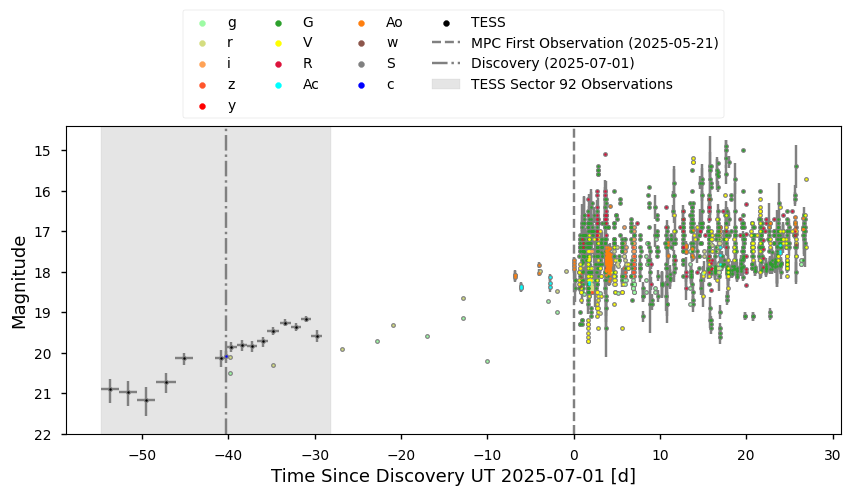

In [29]:
with plt.style.context('seaborn-v0_8-notebook'):
    plt.figure(figsize=(10,4))
    to_plot = []
    # for b in ['g', 'r', 'G', 'V', 'w', 'R', 'z', 'i']:
    
    colors = plt.get_cmap("tab20_r")(np.linspace(0, 1, len(others_lc.band.unique())))
    
    for i, bands in enumerate(plot_filters):
        for k, band in enumerate(bands):
            aux = others_lc.query(f"band == '{band}'")
            plt.scatter(aux.time_utc - discovery_date.jd, aux.mag, label=band, s=2, zorder=10000, color=plot_colors[i][k])
            plt.errorbar(aux.time_utc - discovery_date.jd, aux.mag, yerr=aux.mag_e, fmt=".", c="gray")
        # if i == 2: break
    
    plt.errorbar(lc.time_utc_geo - discovery_date.jd, lc.psf_mag, xerr=lc.t_win/2, yerr=(lc.psf_mag_p, lc.psf_mag_m), fmt=".", c="gray")
    plt.scatter(lc.time_utc_geo - discovery_date.jd, lc.psf_mag, s=2, zorder=10000, c="k", label="TESS")
    
    plt.axvline(0, c="gray", ls="--", label=f"MPC First Observation ({mpc1st.iso[:10]})")
    plt.axvline(mpc1st.jd-discovery_date.jd, c="gray", ls="-.", label=f"Discovery ({discovery_date.iso[:10]})")
    # plt.axhline(np.median(lc.empty_mag3), c="tab:red", ls="--", label="TESS Average $3\sigma$ Detection Limit")
    
    plt.fill_betweenx(np.arange(10, 30), s92[0]- discovery_date.jd, s92[1]- discovery_date.jd, 
                      color='gray', alpha=0.2, label='TESS Sector 92 Observations'
                     )
    
    plt.legend(ncols=4, markerscale=3, fontsize="medium", loc="upper center", bbox_to_anchor=(0.5, 1.4))
    plt.ylabel("Magnitude", fontsize=13)
    plt.xlabel(f"Time Since Discovery UT {discovery_date.iso[:10]} [d]", fontsize=13)
    plt.ylim(14.4, 22.)
    plt.gca().invert_yaxis()
    plt.savefig(
        f"../data/figures/c2025n1_mpclc_s{sector:04}.png", 
        format="png", bbox_inches='tight',
    )
    plt.show()

# Plot stacked images

In [30]:
data1 = np.load("../data/3i_s0092_2-3_images.npz")
data2 = np.load("../data/3i_s0092_1-2_images.npz")

In [31]:
img_stack = np.concatenate([data1["stacked_flux"], data2["stacked_flux"]])
prf_apers = np.concatenate([data1["prf_aperture"][None, :], data2["prf_aperture"][None, :]])

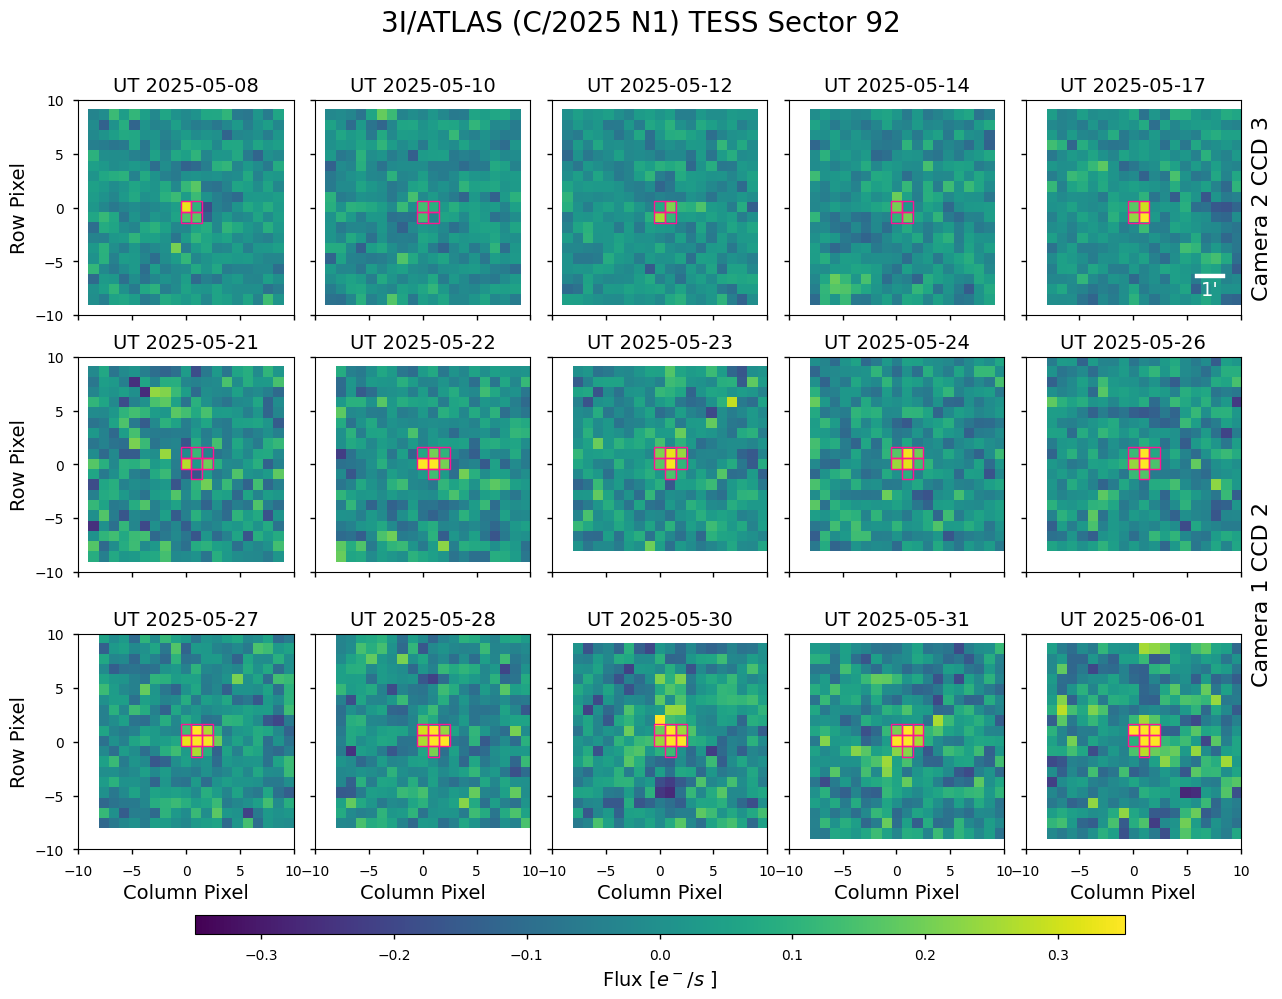

In [32]:
with plt.style.context('seaborn-v0_8-notebook'):
    ncols = 5
    
    fig, ax = plt.subplots(3, ncols, figsize=(15, 10), sharex=True, sharey=True, squeeze=False)
    fig.suptitle(f"{target} TESS Sector {sector}", y=0.95, fontsize=20)
    vmin, vmax = -1, 5
    
    row_plot = np.arange(0, img_stack.shape[1]) - img_stack.shape[1]/2 + 0.5
    col_plot = np.arange(0, img_stack.shape[2]) - img_stack.shape[2]/2 + 0.5
    
    extent = (col_plot[0], col_plot[-1], row_plot[0], row_plot[-1])
    
    for fno, img in enumerate(img_stack):
    
        # plotting stuff
        ax.ravel()[fno].set_title(
            f'UT {lc["time_iso"].iloc[fno][:10]}', 
            fontsize=14
        )
        # plot image
        bar = ax.ravel()[fno].imshow(img, origin="lower", vmin=-0.35, vmax=0.35, extent=extent)
        # add mask
        row, col = np.mgrid[
            0 : img.shape[0], 0 : img.shape[1]
        ]
        if fno // ncols == 0:
            prf_ap = prf_apers[0]
        else:
            prf_ap = prf_apers[1]
    
        for i, pi in enumerate(row_plot):
            for j, pj in enumerate(col_plot):
                if prf_ap[i, j]:
                    # print("here")
                    rect = patches.Rectangle(
                        xy=(pj - 0.5, pi - 0.4),
                        width=1,
                        height=1,
                        color="deeppink",
                        fill=False,
                        # hatch="//",
                        alpha=1,
                        lw=1,
                    )
                    ax.ravel()[fno].add_patch(rect)
    
    
    # add uniform colorbar
    cbar = plt.colorbar(bar, ax=ax[-1], orientation="horizontal", shrink=.8, aspect=50, anchor=(0.5, -5.5)
                       ).set_label(label="Flux [$e^-/s$ ]", size=14)
    # cbar.ax.tick_params(labelsize=18)
    for aa in ax[-1, :]:
        aa.set_xlabel("Column Pixel", fontsize=14)
    for aa in ax[:, 0]:
        aa.set_ylabel("Row Pixel", fontsize=14)
    # ax[1, 0].set_ylabel("N", fontsize=12)
    
    plt.subplots_adjust(
        wspace=0.1,  # Horizontal space between subplots (fraction of subplot width)
        hspace=0.001   # Vertical space between subplots (fraction of subplot height)
    )
    
    ax[0, -1].text(1.1, 0.5, 'Camera 2 CCD 3', rotation='vertical', fontsize=16,
                horizontalalignment='center', verticalalignment='center',
                transform=ax[0, -1].transAxes)
    
    ax[1, -1].text(1.1, -0.1, 'Camera 1 CCD 2', rotation='vertical', fontsize=16,
                horizontalalignment='center', verticalalignment='center',
                transform=ax[1, -1].transAxes)
    
    # scale bar
    fontprops = fm.FontProperties(size=14)
    scalebar = AnchoredSizeBar(ax[0, -1].transData,
                               2.86, "1'", 'lower right', 
                               pad=1,
                               borderpad=-0.2,
                               color="w",
                               frameon=False,
                               size_vertical=0.4,
                               fill_bar=True,
                               fontproperties=fontprops)
    
    ax[0, -1].add_artist(scalebar)
        
        # break
    plt.savefig(
        f"../data/figures/c2025n1_image_stack_all_s{sector:04}.png", 
        format="png", bbox_inches='tight',
    )
    plt.show()

# Hv Light Curve

In [ ]:
from tess_ephem.ephem import _get_horizons_ephem

In [33]:
tstart = Time(lc.time_tdb.values[0], scale="utc", format="jd")
tstop  = Time(lc.time_tdb.values[-1], scale="utc", format="jd")

In [34]:
# geo obs
ephems = _get_horizons_ephem("C/2025 N1", start=tstart, stop=tstop, step="6H", location='399').to_pandas()

In [35]:
d_helio = np.interp(lc.time_utc_geo, ephems.datetime_jd, ephems.r)
d_geo = np.interp(lc.time_utc_geo, ephems.datetime_jd, ephems.delta)

In [36]:
Vhand = lc.psf_mag + 0.8
Vhand_p = np.sqrt(0.3 ** 2 + lc.psf_mag_p.values ** 2)
Vhand_m = np.sqrt(0.3 ** 2 + lc.psf_mag_m.values ** 2)

Text(0, 0.5, 'Tmag')

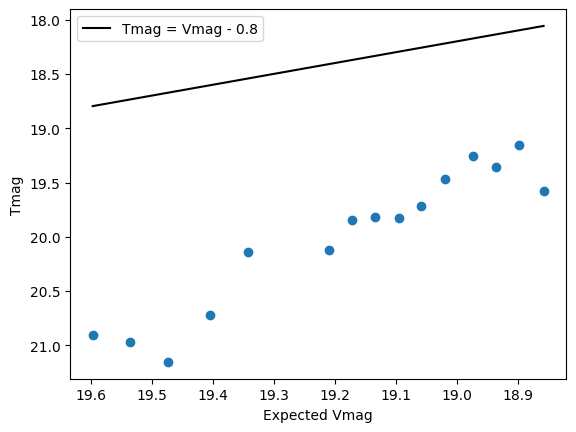

In [43]:
plt.figure()
plt.scatter(lc.v_mag, lc.psf_mag)
plt.plot(np.linspace(lc.v_mag.min(), lc.v_mag.max(), 100), np.linspace(lc.v_mag.min(), lc.v_mag.max(), 100) - 0.8, c="k",label="Tmag = Vmag - 0.8")
plt.legend()
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.xlabel("Expected Vmag")
plt.ylabel("Tmag")

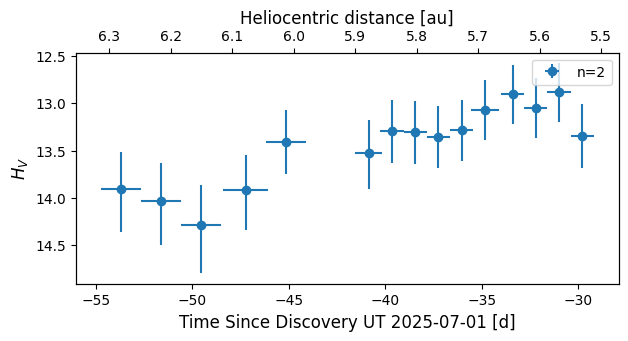

In [38]:
fig, ax = plt.subplots(figsize=(7,3))

for n in [2]:
    HV = Vhand - 2.5 * n * np.log10(d_helio) - 5 * np.log10(d_geo)
    HV_exp = lc.v_mag - 2.5 * n * np.log10(d_helio) - 5 * np.log10(d_geo)
    ax.errorbar(lc.time_utc_geo - discovery_date.jd, HV, xerr=lc.t_win/2, yerr=(Vhand_p, Vhand_m), fmt="o", label=f"n={n}")
    # plt.plot(lc.time_utc_geo - discovery_date.jd, HV_exp)
ax.set_ylabel("$H_V$", fontsize=12)
ax.set_xlabel(f"Time Since Discovery UT {discovery_date.iso[:10]} [d]", fontsize=12)
ax.legend()

axt = ax.twiny()
axt.scatter(d_helio, HV, marker=".", s=0)
axt.invert_yaxis()
axt.invert_xaxis()
axt.set_xlabel(f"Heliocentric distance [au]", fontsize=12)

plt.show()

# Final LC

In [33]:
lc_final = pd.DataFrame(columns=[
    "time_utc", "time_window", "n_frames", "ra", "dec", 
    "ap_flux", "ap_flux_err", "prf_flux", "prf_flux_err", 
    "ap_mag", "ap_mag_err", "prf_mag", "prf_mag_err",
    "ap_snr", "prf_snr",
    "ra_expected", "dec_expected", "vmag_expected"
])

lc_final["time_utc"] = lc.time_utc_geo.values
lc_final["time_window"] = lc.t_win.values
lc_final["ap_flux"] = lc.ap_flux.values
lc_final["ap_flux_err"] = lc.ap_flux_err.values
lc_final["prf_flux"] = lc.psf_flux.values
lc_final["prf_flux_err"] = lc.psf_flux_err.values
lc_final["ap_mag"] = lc.ap_mag.values
lc_final["ap_mag_err"] = lc.ap_mag_err.values
lc_final["prf_mag"] = lc.psf_mag.values
lc_final["prf_mag_err"] = lc.psf_mag_err.values
lc_final["n_frames"] = lc.nframes.values
lc_final["ra"] = lc.ra_ephem.values - lc.ra_offset/3600
lc_final["dec"] = lc.dec_ephem.values - lc.dec_offset/3600
lc_final["ra_expected"] = lc.ra_ephem.values
lc_final["dec_expected"] = lc.dec_ephem.values
lc_final["ra_offset"] = lc.ra_offset.values
lc_final["dec_offset"] = lc.dec_offset.values
lc_final["vmag_expected"] = lc.v_mag.values
lc_final["ap_snr"] = np.abs(lc.ap_flux / np.mean(lc.empty_flux3))
lc_final["prf_snr"] = np.abs(lc.psf_flux / np.mean(lc.empty_flux3))

lc_final

,time_utc,time_window,n_frames,ra,dec,ap_flux,ap_flux_err,prf_flux,prf_flux_err,ap_mag,ap_mag_err,prf_mag,prf_mag_err,ap_snr,prf_snr,ra_expected,dec_expected,vmag_expected,ra_offset,dec_offset
0,2.460804e+06,2.083541,901,288.148293,-18.705931,0.579229,0.188393,0.652136,0.177146,21.032874,0.356655,20.904154,0.299137,3.935812,4.431209,288.145016,-18.704941,19.596467,-11.798140,3.561936
1,2.460806e+06,2.083533,901,287.862892,-18.689362,0.317999,0.180103,0.615402,0.171946,21.683936,0.616952,20.967103,0.307453,2.160775,4.181602,287.859421,-18.691421,19.534868,-12.494990,-7.412972
2,2.460808e+06,2.083525,901,287.549061,-18.680432,0.417454,0.171737,0.518862,0.164701,21.388480,0.449453,21.152370,0.348250,2.836562,3.525625,287.545615,-18.682061,19.473426,-12.406801,-5.864718
3,2.460810e+06,2.298814,901,287.177379,-18.678503,0.363473,0.178811,0.775111,0.180193,21.538821,0.536464,20.716590,0.257310,2.469766,5.266812,287.174324,-18.678788,19.404286,-10.997023,-1.025126
4,2.460813e+06,2.083511,901,286.820960,-18.681145,0.716149,0.181587,1.318270,0.186553,20.802492,0.279804,20.139989,0.161577,4.866168,8.957533,286.818249,-18.682879,19.341742,-9.760536,-6.241976
5,2.460817e+06,1.421420,521,286.046352,-18.701293,0.563384,0.395179,1.337067,0.253697,21.062988,0.763217,20.124617,0.211990,3.828147,9.085259,286.044842,-18.704882,19.209173,-5.436386,-12.921971
6,2.460818e+06,1.203807,521,285.804378,-18.698238,1.412402,0.355350,1.724529,0.213361,20.065104,0.277701,19.848324,0.143333,9.597153,11.718030,285.803729,-18.701706,19.171682,-2.335362,-12.482371
7,2.460819e+06,1.203803,521,285.547152,-18.693986,1.590032,0.353950,1.773226,0.224193,19.936486,0.246809,19.818090,0.146095,10.804130,12.048917,285.546765,-18.697126,19.133663,-1.393563,-11.303277
8,2.460820e+06,1.203799,521,285.278422,-18.691015,1.297085,0.353985,1.754678,0.217324,20.157579,0.300496,19.829506,0.143467,8.813580,11.922890,285.277882,-18.693694,19.095503,-1.946370,-9.642215
9,2.460822e+06,1.203795,521,284.999864,-18.689877,1.605221,0.364196,1.939173,0.228458,19.926163,0.251357,19.720958,0.137338,10.907342,13.176518,284.998927,-18.692039,19.058012,-3.372628,-7.783218


In [34]:
lc_final.to_csv("../data/3i_tess_s0092_time_series.csv")

In [44]:
from astropy.table import QTable

In [45]:
mr_tab = QTable(
    lc_final.values,
    names=[
        "Time UTC", "Time Window", "N Frames",
        "RA", "DEC", 
        "Aperture Flux", "Aperture Flux Err", "PRF Flux", "PRF Flux Err", 
        "Aperture Mag", "Aperture Mag Err", "PRF Mag", "PRF Mag Err", 
        "Aperture SNR", "PRF SNR",
        "RA Expected", "DEC Expected", "Vmag Expected",
        "RA offset", "DEC offset"
    ],
    units=[
 u.d, u.d,
 None,
 u.electron / u.second,
 u.electron / u.second,
 u.electron / u.second,
 u.electron / u.second,
 u.mag, u.mag, u.mag, u.mag,
 None, None,
 "deg", "deg", "deg", "deg",
 u.mag, u.arcsec, u.arcsec,
    ],
    descriptions=[
        "Time in UTC", "Size of time window", "Number of stacked frames",
        "Measured Right Ascension", "Measured Declination",
        "Aperture flux", "Aperture flux error", "PRF flux", "PRF flux error",
        "Aperture TESS magnitude", "Aperture TESS magnitude error", "PRF TESS magnitude", "PRF TESS magnitude error",
        "Aperture flux SNR", "PRF flux SNR",
        "Expected RA from ephemeris", "Expected DEC from ephemeris", "Expected Vmag from ephemeris",
        "Computed RA offset", "Computed DEC offset"
    ]
)
mr_tab

Time UTC,Time Window,N Frames,RA,DEC,Aperture Flux,Aperture Flux Err,PRF Flux,PRF Flux Err,Aperture Mag,Aperture Mag Err,PRF Mag,PRF Mag Err,Aperture SNR,PRF SNR,RA Expected,DEC Expected,Vmag Expected,RA offset,DEC offset
d,d,,electron / s,electron / s,electron / s,electron / s,mag,mag,mag,mag,,,deg,deg,deg,deg,mag,arcsec,arcsec
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
2460804.017658781,2.0835411333468983,901.0,288.1472008648136,-18.70560105011689,0.5792289818972071,0.1883929010899641,0.6521360862229059,0.1771461153726618,21.032874290528923,0.3566553918749299,20.904154418152327,0.2991374467038734,3.935811706248074,4.431209284134911,288.14501602408865,-18.70494143241218,19.596466976105862,-7.865426609942006,2.374623736957915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2460827.9374490725,1.2014649604793703,520.0,283.4220143167306,-18.71728298721007,3.1600284574507516,0.5038994291600961,2.2156495009783073,0.3088392873126769,19.190772515876315,0.1802072924853806,19.576247351544954,0.159386367689219,21.47212481353168,15.055150062295551,283.4220265464939,-18.718823415291467,18.85797588130091,0.04402714776006178,-5.545541093033535
